In [2]:
import pandas as pd
import json
import os
import math
import numpy as np
import librosa, librosa.display

##**READ DATASET**

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andradaolteanu/gtzan-dataset-music-genre-classification")

print("Path to dataset files:", path)

/workspaces/Music-Genre-Classification/myenv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/codespace/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1


In [4]:
PATH = path
df = pd.read_csv(f"{PATH}/Data/features_3_sec.csv")
df.head(10)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
5,blues.00000.5.wav,66149,0.376670,0.089702,0.132618,0.003583,1994.915219,211700.619569,2152.767854,74263.873102,...,31.448069,-3.448373,34.284130,-0.416165,40.791092,-3.649625,32.457901,3.025218,28.892687,blues
6,blues.00000.6.wav,66149,0.379909,0.088827,0.130335,0.003166,1962.150096,177443.070045,2146.503479,98020.541422,...,33.954071,-2.068194,25.623655,1.428141,47.957699,-3.267124,39.382240,3.276939,25.999132,blues
7,blues.00000.7.wav,66149,0.331880,0.092119,0.140600,0.002546,1701.890924,35678.130616,1979.387612,36670.725886,...,38.456211,-3.637886,24.530296,-0.105148,26.716150,-2.016985,23.150423,0.210787,42.512966,blues
8,blues.00000.8.wav,66149,0.347877,0.094209,0.133130,0.002538,1746.473502,138073.931244,1887.619723,117069.920049,...,44.311455,-4.370029,29.873167,2.114592,33.843155,-2.264663,80.812393,3.758598,97.618835,blues
9,blues.00000.9.wav,66149,0.358061,0.082957,0.115312,0.001846,1763.948942,61493.423121,1874.195710,51944.921435,...,43.967834,-3.448304,48.671944,0.099792,41.839546,-7.677177,96.253654,0.791776,40.416420,blues


##**ABOUT DATASET**

In [5]:
print("Dataset has",df.shape)
print("Count of Positive and Negative samples")
df.label.value_counts().reset_index()

Dataset has (9990, 60)
Count of Positive and Negative samples


,index,label
0,pop,1000
1,reggae,1000
2,metal,1000
3,jazz,1000
4,blues,1000
5,disco,999
6,hiphop,998
7,rock,998
8,classical,998
9,country,997


In [6]:
print("Columns with NA values are",list(df.columns[df.isnull().any()]))

Columns with NA values are []


In [7]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [8]:
df = df.drop(labels="filename", axis=1)

In [9]:
df.head(10)

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
5,66149,0.376670,0.089702,0.132618,0.003583,1994.915219,211700.619569,2152.767854,74263.873102,4371.985614,...,31.448069,-3.448373,34.284130,-0.416165,40.791092,-3.649625,32.457901,3.025218,28.892687,blues
6,66149,0.379909,0.088827,0.130335,0.003166,1962.150096,177443.070045,2146.503479,98020.541422,4325.026668,...,33.954071,-2.068194,25.623655,1.428141,47.957699,-3.267124,39.382240,3.276939,25.999132,blues
7,66149,0.331880,0.092119,0.140600,0.002546,1701.890924,35678.130616,1979.387612,36670.725886,3625.280386,...,38.456211,-3.637886,24.530296,-0.105148,26.716150,-2.016985,23.150423,0.210787,42.512966,blues
8,66149,0.347877,0.094209,0.133130,0.002538,1746.473502,138073.931244,1887.619723,117069.920049,3586.934721,...,44.311455,-4.370029,29.873167,2.114592,33.843155,-2.264663,80.812393,3.758598,97.618835,blues
9,66149,0.358061,0.082957,0.115312,0.001846,1763.948942,61493.423121,1874.195710,51944.921435,3505.522649,...,43.967834,-3.448304,48.671944,0.099792,41.839546,-7.677177,96.253654,0.791776,40.416420,blues


##**DATA VISUALIZATION**

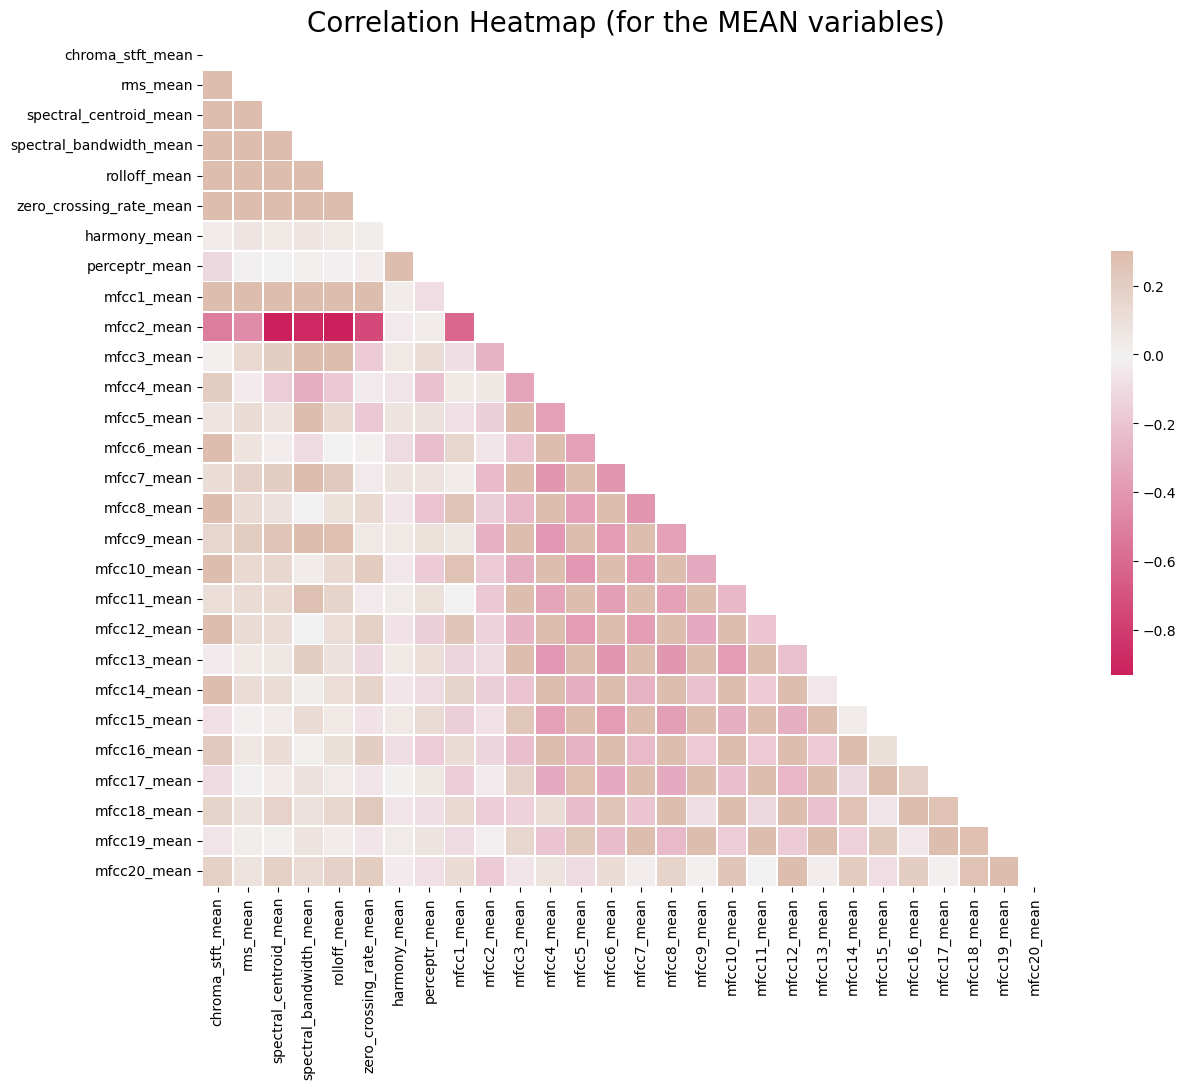

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
# Computing the Correlation Matrix
spike_cols = [col for col in df.columns if 'mean' in col]
corr = df[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr_Heatmap.png")

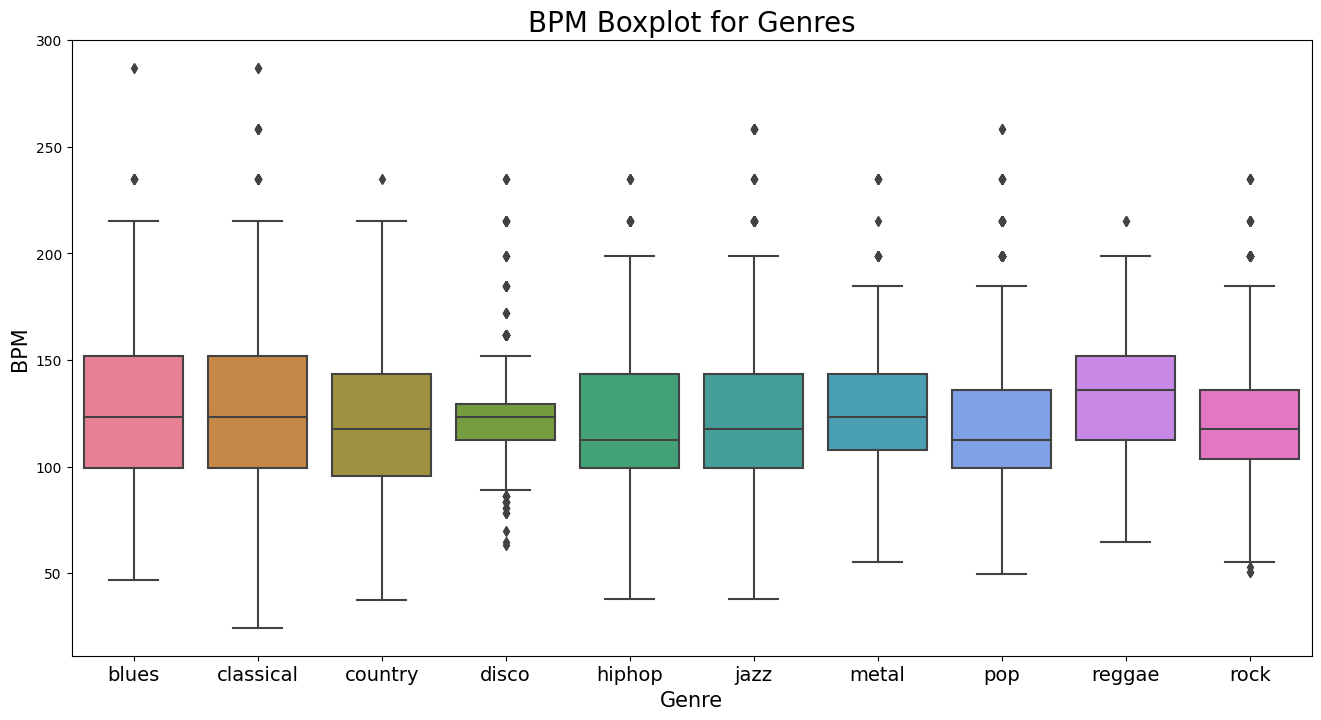

In [11]:
x = df[["label", "tempo"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM_Boxplot.png")

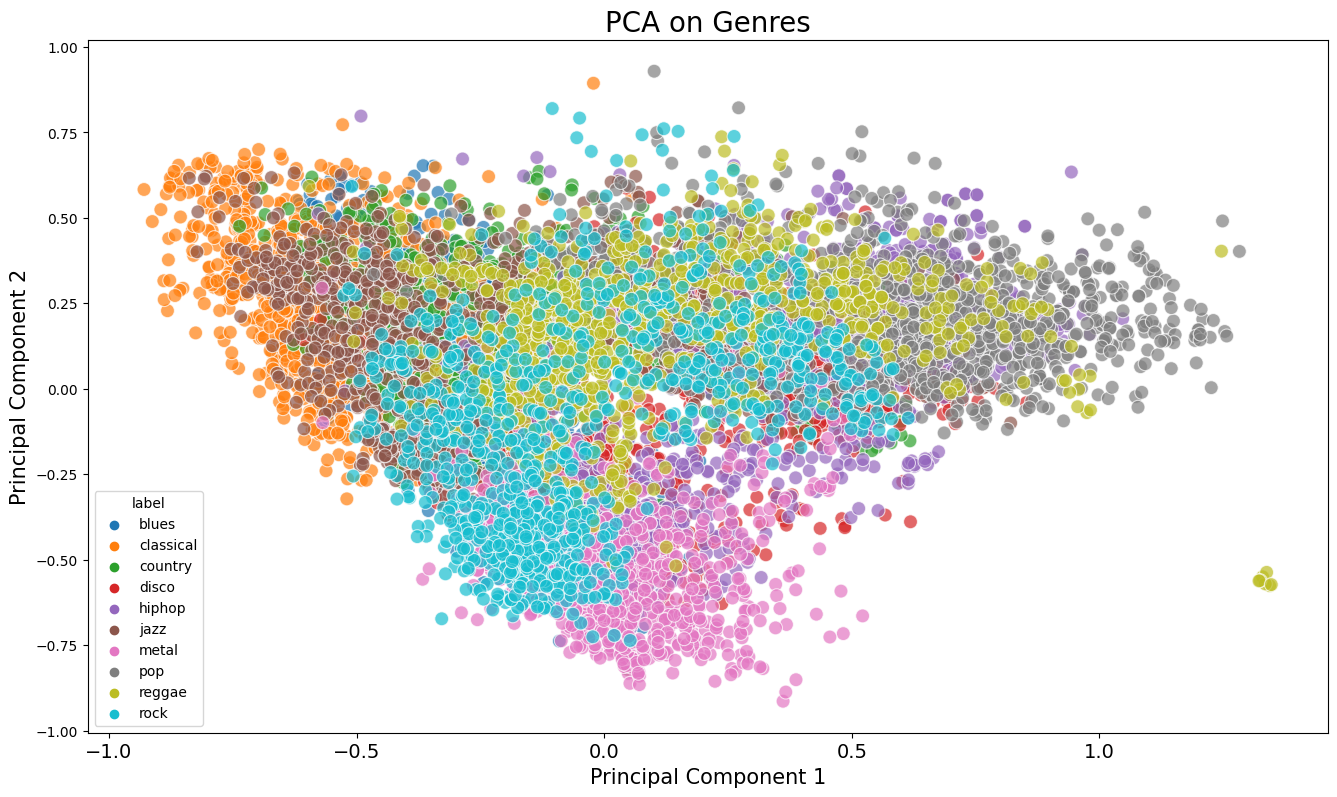

In [12]:
import sklearn.preprocessing as skp
data = df.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

# normalize
cols = X.columns
min_max_scaler = skp.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

# Top 2 pca components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

plt.figure(figsize = (16, 9))
sns.scatterplot(x = "pc1", y = "pc2", data = finalDf, hue = "label", alpha = 0.7, s = 100);

plt.title('PCA on Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA_Scattert.png")

##**BUILDING MODEL**

In [13]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

import matplotlib.pyplot as plt
import random

import librosa
import math

2025-06-05 14:03:52.692304: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-06-05 14:03:52.692338: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [14]:
DATASET_PATH = f"{PATH}/Data/genres_original"
JSON_PATH = "data_10.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

In [15]:
def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    """Extracts MFCCs from music dataset and saves them into a json file along witgh genre labels.
        :param dataset_path (str): Path to dataset
        :param json_path (str): Path to json file used to save MFCCs
        :param num_mfcc (int): Number of coefficients to extract
        :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
        :param hop_length (int): Sliding window for FFT. Measured in # of samples
        :param: num_segments (int): Number of segments we want to divide sample tracks into
        :return:
        """

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:

		# load audio file

                file_path = os.path.join(dirpath, f)
            
                if file_path != f'{PATH}/Data/genres_original/jazz/jazz.00054.wav':

                    signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
                
                
                    # process all segments of audio file
                    for d in range(num_segments):

                        # calculate start and finish sample for current segment
                        start = samples_per_segment * d
                        finish = start + samples_per_segment

                        # extract mfcc
                        mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                        mfcc = mfcc.T

                        # store only mfcc feature with expected number of vectors
                        if len(mfcc) == num_mfcc_vectors_per_segment:
                            data["mfcc"].append(mfcc.tolist())
                            data["labels"].append(i-1)
                            print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

In [16]:
save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)


Processing: blues
/home/codespace/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/Data/genres_original/blues/blues.00067.wav, segment:1
/home/codespace/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/Data/genres_original/blues/blues.00067.wav, segment:2
/home/codespace/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/Data/genres_original/blues/blues.00067.wav, segment:3
/home/codespace/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/Data/genres_original/blues/blues.00067.wav, segment:4
/home/codespace/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/Data/genres_original/blues/blues.00067.wav, segment:5
/home/codespace/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/Data/genres_original/blues/blues.00067.wav, segment:6
/ho

In [17]:
# path to json
DATA_PATH = "data_10.json"

In [18]:
def load_data(data_path):

    with open(data_path, "r") as f:
        data = json.load(f)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, y

In [19]:
# load data
X, y = load_data(DATA_PATH)

Data succesfully loaded!


In [20]:
X.shape

(9986, 130, 13)

In [21]:
# create train, validation and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# add an axis to input sets
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [22]:
X_train.shape

(7489, 130, 13, 1)

In [23]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [24]:
from keras.regularizers import l2
# build the CNN
model_cnn = keras.Sequential()

# 1st conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())


# 2nd conv layer
model_cnn.add(keras.layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_uniform',kernel_regularizer=l2(0.0001)))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())
model_cnn.add(keras.layers.Dropout(0.3))

# 3rd conv layer
model_cnn.add(keras.layers.Conv2D(128, (2, 2), activation='relu',kernel_initializer='he_uniform',kernel_regularizer=l2(0.0001)))
model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())
model_cnn.add(keras.layers.Dropout(0.3))

# flatten output and feed it into dense layer
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(128, activation='relu',kernel_initializer='he_uniform',kernel_regularizer=l2(0.0001)))
model_cnn.add(keras.layers.BatchNormalization())
model_cnn.add(keras.layers.Dropout(0.3))

# output layer
model_cnn.add(keras.layers.Dense(10, activation='softmax'))

2025-06-05 14:07:34.352081: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2025-06-05 14:07:34.352135: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2025-06-05 14:07:34.352155: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (codespaces-2a58f6): /proc/driver/nvidia/version does not exist
2025-06-05 14:07:34.352406: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_cnn.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks = [
             EarlyStopping(patience=3)
]

In [27]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 11, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 6, 32)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 6, 32)         128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 4, 64)         18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 2, 64)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 2, 64)         256       
_________________________________________________________________
dropout (Dropout)            (None, 31, 2, 64)         0

In [30]:
# train model
history = model_cnn.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=10,callbacks=callbacks)

Epoch 1/10
  7/235 [..............................] - ETA: 5s - loss: 1.2082 - accuracy: 0.6071

235/235 [==============================] - 7s 29ms/step - loss: 0.9700 - accuracy: 0.6870 - val_loss: 0.9535 - val_accuracy: 0.6792
Epoch 2/10
235/235 [==============================] - 7s 31ms/step - loss: 0.9432 - accuracy: 0.6923 - val_loss: 0.9445 - val_accuracy: 0.6860
Epoch 3/10
235/235 [==============================] - 7s 29ms/step - loss: 0.9194 - accuracy: 0.6966 - val_loss: 0.9256 - val_accuracy: 0.6948
Epoch 4/10
235/235 [==============================] - 8s 32ms/step - loss: 0.8863 - accuracy: 0.7104 - val_loss: 0.9160 - val_accuracy: 0.7004
Epoch 5/10
235/235 [==============================] - 8s 34ms/step - loss: 0.8727 - accuracy: 0.7164 - val_loss: 0.8857 - val_accuracy: 0.7173
Epoch 6/10
235/235 [==============================] - 8s 34ms/step - loss: 0.8423 - accuracy: 0.7233 - val_loss: 0.9058 - val_accuracy: 0.7072
Epoch 7/10
235/235 [==============================] - 7s 31ms/step - loss: 0.8080 - accuracy: 0.7369 - val_loss: 0.8774 - val_accuracy: 0.7113
Epoch 8/10

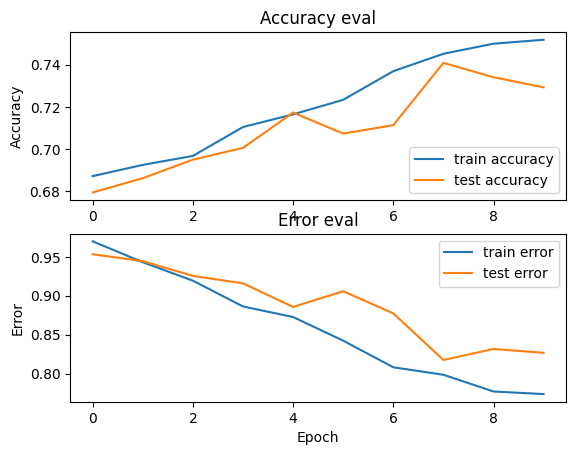

In [31]:
def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()


# plot accuracy and error as a function of the epochs
plot_history(history)

In [32]:
import pandas as pd
metrics_df = pd.DataFrame(history.history)
metrics_df.tail(10)

,loss,accuracy,val_loss,val_accuracy
0,0.969997,0.687008,0.953463,0.679215
1,0.943188,0.692349,0.944543,0.686023
2,0.919411,0.696622,0.925588,0.694834
3,0.886268,0.710375,0.915987,0.700441
4,0.872654,0.716384,0.885664,0.717261
5,0.842272,0.723328,0.905830,0.707249
6,0.808035,0.736948,0.877373,0.711254
7,0.798424,0.745226,0.817416,0.740889
8,0.776899,0.750033,0.831580,0.734081
9,0.773558,0.751903,0.826639,0.729275


In [33]:
# evaluate model on Test Set
test_loss, test_acc = model_cnn.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

79/79 - 0s - loss: 0.8266 - accuracy: 0.7293

Test accuracy: 0.729275107383728


In [34]:
model_cnn.save("MusicGenre_CNN.h5")

In [35]:
new_model = keras.models.load_model("MusicGenre_CNN.h5")
new_model.evaluate(X_test,y_test,batch_size=128)

20/20 [==============================] - 1s 26ms/step - loss: 0.8266 - accuracy: 0.7293


[0.8266395330429077, 0.729275107383728]

#**TESTING ON TEST DATASET**

In [36]:
# pick a sample to predict from the test set
X_to_predict = X_test[100]
y_to_predict = y_test[100]

In [37]:
X_to_predict.shape

(130, 13, 1)

In [38]:
# add a dimension to input data for sample - model.predict() expects a 4d array in this case
X_to_predict = X_to_predict[np.newaxis, ...] # array shape (1, 130, 13, 1)

In [39]:
X_to_predict.shape

(1, 130, 13, 1)

In [40]:
# perform prediction
prediction = model_cnn.predict(X_to_predict)

In [41]:
# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", int(predicted_index))

Predicted Genre: 7


####**ALL in ONE**

In [42]:
# pick a sample to predict from the test set
X_to_predict = X_test[50]
y_to_predict = y_test[50]

print("Real Genre:", y_to_predict)

X_to_predict = X_to_predict[np.newaxis, ...]

prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", int(predicted_index))

Real Genre: 1
Predicted Genre: 1


####**MULTI-TESTING ON TEST DATASET**

In [43]:
import random
for n in range(10):

  i = random.randint(0,len(X_test))
  # pick a sample to predict from the test set
  X_to_predict = X_test[i]
  y_to_predict = y_test[i]

  print("\nReal Genre:", y_to_predict)

  X_to_predict = X_to_predict[np.newaxis, ...]

  prediction = model_cnn.predict(X_to_predict)

  # get index with max value
  predicted_index = np.argmax(prediction, axis=1)

  print("Predicted Genre:", int(predicted_index))


Real Genre: 2
Predicted Genre: 2

Real Genre: 7
Predicted Genre: 7

Real Genre: 9
Predicted Genre: 9

Real Genre: 6
Predicted Genre: 8

Real Genre: 1
Predicted Genre: 1

Real Genre: 4
Predicted Genre: 4

Real Genre: 8
Predicted Genre: 8

Real Genre: 6
Predicted Genre: 6

Real Genre: 3
Predicted Genre: 3

Real Genre: 0
Predicted Genre: 0


#**TESTING with EXTERNAL DATA**

In [44]:
# Audio files pre-processing
def process_input(audio_file, track_duration):

  SAMPLE_RATE = 22050
  NUM_MFCC = 13
  N_FTT=2048
  HOP_LENGTH=512
  TRACK_DURATION = track_duration # measured in seconds
  SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
  NUM_SEGMENTS = 10

  samples_per_segment = int(SAMPLES_PER_TRACK / NUM_SEGMENTS)
  num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / HOP_LENGTH)

  signal, sample_rate = librosa.load(audio_file, sr=SAMPLE_RATE)
  
  for d in range(10):

    # calculate start and finish sample for current segment
    start = samples_per_segment * d
    finish = start + samples_per_segment

    # extract mfcc
    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=NUM_MFCC, n_fft=N_FTT, hop_length=HOP_LENGTH)
    mfcc = mfcc.T

    return mfcc

In [45]:
genre_dict = {0:"disco ",1:"pop",2:"classical",3:"metal",4:"rock",5:"blues",6:"hiphop",7:"reggae",8:"country",9:"jazz"}

In [46]:
new_input_mfcc = process_input(f"{PATH}/Data/genres_original/blues/blues.00000.wav", 30)

In [48]:
type(new_input_mfcc)

numpy.ndarray

In [49]:
new_input_mfcc.shape

(130, 13)

In [50]:
X_to_predict = new_input_mfcc[np.newaxis, ..., np.newaxis]
X_to_predict.shape

(1, 130, 13, 1)

In [51]:
prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", genre_dict[int(predicted_index)])

Predicted Genre: jazz


In [60]:
import joblib
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Flatten MFCC features for SVM input
X_flat = X.reshape(X.shape[0], -1)

# Split data for SVM
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_flat, y, test_size=0.25, random_state=42)

# Train SVM
svm_clf = SVC(kernel='linear', probability=True)

svm_clf.fit(X_train_svm, y_train_svm)

# Evaluate SVM
svm_preds = svm_clf.predict(X_test_svm)
print("SVM Results on MFCC features:\n", classification_report(y_test_svm, svm_preds))

# Export SVM model
joblib.dump(svm_clf, "MusicGenre_SVM.joblib")
print("SVM model exported as MusicGenre_SVM.joblib")

SVM Results on MFCC features:
               precision    recall  f1-score   support

           0       0.33      0.43      0.37       258
           1       0.64      0.81      0.71       256
           2       0.35      0.35      0.35       234
           3       0.23      0.26      0.25       247
           4       0.36      0.29      0.32       269
           5       0.33      0.26      0.29       234
           6       0.63      0.60      0.61       245
           7       0.74      0.84      0.78       244
           8       0.47      0.40      0.43       250
           9       0.35      0.26      0.30       260

    accuracy                           0.45      2497
   macro avg       0.44      0.45      0.44      2497
weighted avg       0.44      0.45      0.44      2497

SVM model exported as MusicGenre_SVM.joblib


In [61]:
import joblib
import numpy as np

# Load the exported SVM model
svm_model = joblib.load("MusicGenre_SVM.joblib")

# Example: Predict genre for a new music sample
# Let's use the same process_input function to extract MFCCs from an audio file
# and flatten it for SVM input

def predict_genre_with_svm(audio_file, track_duration=30):
    mfcc = process_input(audio_file, track_duration)
    # Flatten to match SVM input shape
    mfcc_flat = mfcc.flatten().reshape(1, -1)
    # If needed, pad or truncate to match training shape
    expected_shape = svm_model.n_features_in_
    if mfcc_flat.shape[1] < expected_shape:
        # pad with zeros
        pad_width = expected_shape - mfcc_flat.shape[1]
        mfcc_flat = np.pad(mfcc_flat, ((0,0),(0,pad_width)), mode='constant')
    elif mfcc_flat.shape[1] > expected_shape:
        # truncate
        mfcc_flat = mfcc_flat[:, :expected_shape]
    pred = svm_model.predict(mfcc_flat)
    print("Predicted Genre:", genre_dict[int(pred[0])])

# Example usage:
predict_genre_with_svm(f"{PATH}/Data/genres_original/blues/blues.00000.wav", 30)

Predicted Genre: disco 


SVM Test Accuracy: 0.4501


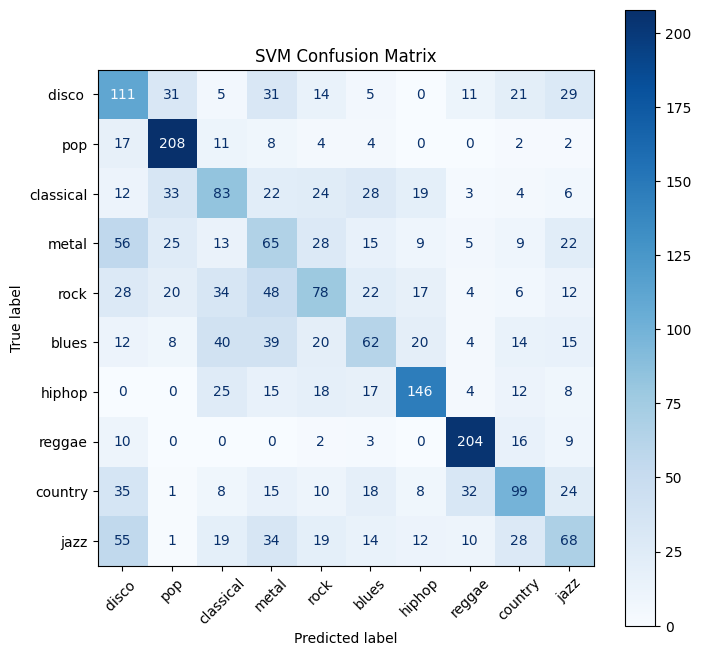

In [62]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Predict on the SVM test set
svm_test_preds = svm_model.predict(X_test_svm)
svm_test_acc = accuracy_score(y_test_svm, svm_test_preds)

print(f"SVM Test Accuracy: {svm_test_acc:.4f}")

# Plot confusion matrix
cm = confusion_matrix(y_test_svm, svm_test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(genre_dict.values()))
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
plt.title("SVM Confusion Matrix")
plt.show()

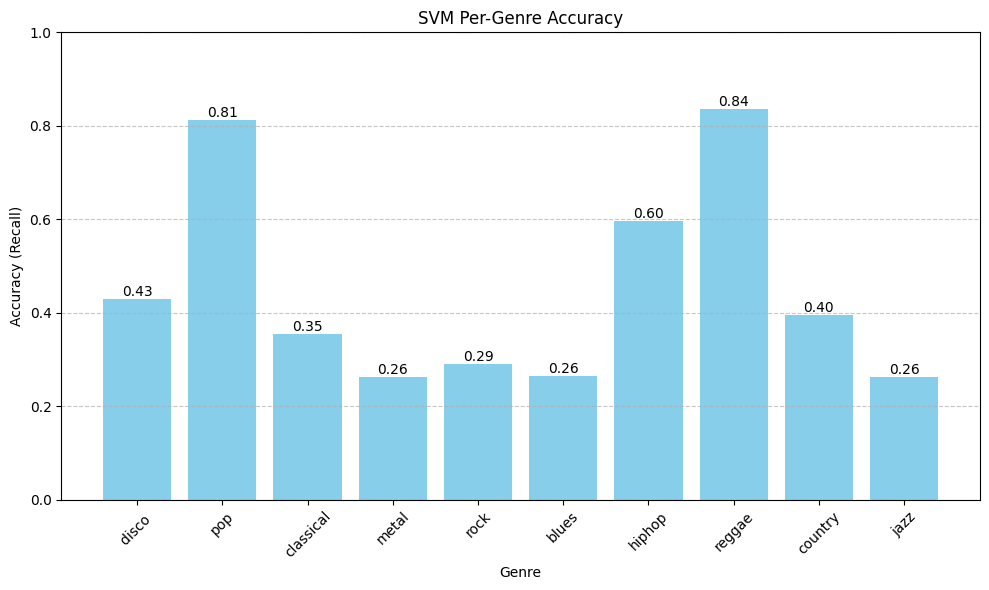

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate accuracy per genre (recall per class)
from sklearn.metrics import recall_score

genre_labels = list(genre_dict.values())
cm = confusion_matrix(y_test_svm, svm_test_preds)
genre_accuracy = cm.diagonal() / cm.sum(axis=1)

plt.figure(figsize=(10,6))
bars = plt.bar(genre_labels, genre_accuracy, color='skyblue')
plt.ylim(0, 1)
plt.ylabel('Accuracy (Recall)')
plt.xlabel('Genre')
plt.title('SVM Per-Genre Accuracy')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar, acc in zip(bars, genre_accuracy):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{acc:.2f}", ha='center', va='bottom')
plt.tight_layout()
plt.show()

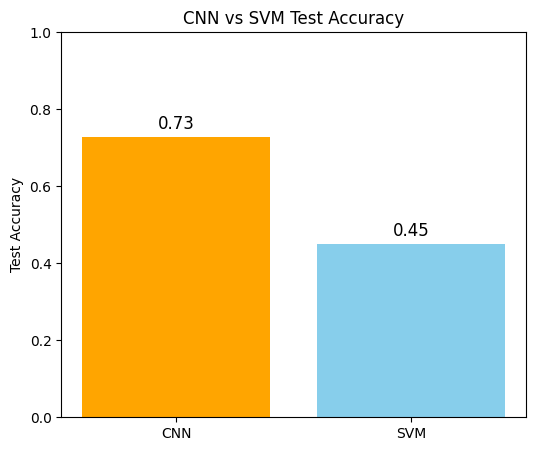

CNN Classification Report:
               precision    recall  f1-score   support

      disco        0.82      0.83      0.83       242
         pop       0.90      0.81      0.85       238
   classical       0.77      0.71      0.74       250
       metal       0.60      0.53      0.56       246
        rock       0.53      0.84      0.65       251
       blues       0.73      0.69      0.71       258
      hiphop       0.93      0.48      0.63       260
      reggae       0.86      0.92      0.89       249
     country       0.68      0.87      0.76       250
        jazz       0.70      0.63      0.66       253

    accuracy                           0.73      2497
   macro avg       0.75      0.73      0.73      2497
weighted avg       0.75      0.73      0.73      2497

SVM Classification Report:
               precision    recall  f1-score   support

      disco        0.33      0.43      0.37       258
         pop       0.64      0.81      0.71       256
   classical       0.3

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# CNN accuracy and predictions
cnn_test_loss, cnn_test_acc = model_cnn.evaluate(X_test, y_test, verbose=0)
cnn_preds = np.argmax(model_cnn.predict(X_test), axis=1)

# SVM accuracy and predictions (already computed)
# svm_test_acc = accuracy_score(y_test_svm, svm_test_preds)

# Bar plot for overall accuracy comparison
plt.figure(figsize=(6,5))
plt.bar(['CNN', 'SVM'], [cnn_test_acc, svm_test_acc], color=['orange', 'skyblue'])
plt.ylim(0, 1)
plt.ylabel('Test Accuracy')
plt.title('CNN vs SVM Test Accuracy')
for i, acc in enumerate([cnn_test_acc, svm_test_acc]):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', va='bottom', fontsize=12)
plt.show()

# Print classification reports for both models
print("CNN Classification Report:\n", classification_report(y_test, cnn_preds, target_names=list(genre_dict.values())))
print("SVM Classification Report:\n", classification_report(y_test_svm, svm_test_preds, target_names=list(genre_dict.values())))

In [65]:
# SVM percent match for each genre
def predict_genre_with_svm_probs(audio_file, track_duration=30):
    mfcc = process_input(audio_file, track_duration)
    mfcc_flat = mfcc.flatten().reshape(1, -1)
    expected_shape = svm_model.n_features_in_
    if mfcc_flat.shape[1] < expected_shape:
        pad_width = expected_shape - mfcc_flat.shape[1]
        mfcc_flat = np.pad(mfcc_flat, ((0,0),(0,pad_width)), mode='constant')
    elif mfcc_flat.shape[1] > expected_shape:
        mfcc_flat = mfcc_flat[:, :expected_shape]
    probs = svm_model.predict_proba(mfcc_flat)[0]
    for idx, prob in enumerate(probs):
        print(f"{genre_dict[idx]}: {prob*100:.2f}%")
    pred = np.argmax(probs)
    print("Predicted Genre:", genre_dict[int(pred)])

# Example usage:
predict_genre_with_svm_probs(f"{PATH}/Data/genres_original/blues/blues.00000.wav", 30)

disco : 22.83%
pop: 3.43%
classical: 11.60%
metal: 12.03%
rock: 12.51%
blues: 10.41%
hiphop: 0.47%
reggae: 5.09%
country: 9.51%
jazz: 12.13%
Predicted Genre: disco 


In [66]:
# CNN percent match for each genre
def predict_genre_with_cnn_probs(audio_file, track_duration=30):
    mfcc = process_input(audio_file, track_duration)
    X_to_predict = mfcc[np.newaxis, ..., np.newaxis]
    probs = model_cnn.predict(X_to_predict)[0]
    for idx, prob in enumerate(probs):
        print(f"{genre_dict[idx]}: {prob*100:.2f}%")
    pred = np.argmax(probs)
    print("Predicted Genre:", genre_dict[int(pred)])

# Example usage:
predict_genre_with_cnn_probs(f"{PATH}/Data/genres_original/blues/blues.00000.wav", 30)

disco : 10.84%
pop: 0.91%
classical: 1.12%
metal: 19.04%
rock: 19.27%
blues: 2.87%
hiphop: 0.49%
reggae: 2.36%
country: 18.85%
jazz: 24.26%
Predicted Genre: jazz


In [67]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Flatten MFCC features for SVM input
X_flat = X.reshape(X.shape[0], -1)

# Feature scaling (very important for SVM)
scaler = StandardScaler()
X_flat_scaled = scaler.fit_transform(X_flat)

# Optional: Dimensionality reduction (try 95% variance)
pca = PCA(n_components=0.95, svd_solver='full')
X_flat_pca = pca.fit_transform(X_flat_scaled)

# Split data for SVM
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_flat_pca, y, test_size=0.25, random_state=42, stratify=y)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear', 'poly'],
    'gamma': ['scale', 'auto']
}
svm = SVC(probability=True)
grid = GridSearchCV(svm, param_grid, cv=3, n_jobs=-1, verbose=2)
grid.fit(X_train_svm, y_train_svm)

print("Best SVM parameters:", grid.best_params_)

# Evaluate SVM
svm_best = grid.best_estimator_
svm_preds = svm_best.predict(X_test_svm)
print("SVM Results on MFCC features:\n", classification_report(y_test_svm, svm_preds))
print("SVM Test Accuracy: {:.4f}".format(accuracy_score(y_test_svm, svm_preds)))

# Save the improved SVM model and scaler/pca
joblib.dump(svm_best, "MusicGenre_SVM_Improved.joblib")
joblib.dump(scaler, "MusicGenre_SVM_Scaler.joblib")
joblib.dump(pca, "MusicGenre_SVM_PCA.joblib")

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  37.2s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  38.5s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  38.9s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  43.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=  25.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=  27.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  41.8s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  46.7s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=  27.7s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=  51.9s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=  49.9s
[CV] END ...................C=0.1, gamma=auto, k

KeyboardInterrupt: 